In [1]:
from adsorp_libary.BJH_calculation import BJH_method
from adsorp_libary.utilis import use_my_pressure_points
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [19]:
sheetnames = ['3_53_N2','4_34_H1_N2','1_223_kerogen_N2','2_93_450_N2']
sheetnames_Ar = ['3_14_450_Ar']
sheetname = sheetnames_Ar[0]
gas_type = 'Ar'
print(sheetname, gas_type)
df_iso = pd.read_excel('adsorp_libary/test_isos.xlsx',sheetname) # 3_14_F1_N2
df_psd = pd.read_excel('adsorp_libary/test_psds.xlsx', sheetname)

p_rels = df_iso['p_rels'].values
q_abs =  df_iso['q_abs'].values

Pore_D = df_psd['D'].values
Pore_volume = df_psd['IPV'].values

3_14_450_Ar Ar


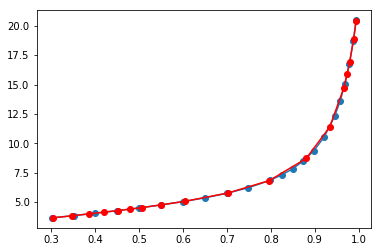

In [20]:
p_my, q_my = use_my_pressure_points(p_rels, q_abs, gas_type = 'N2')
plt.plot(p_rels,q_abs,'o-')
plt.plot(p_my,q_my,'or-')

0.301720534985 3.65955818794 0.994329315232 20.4642986955
20


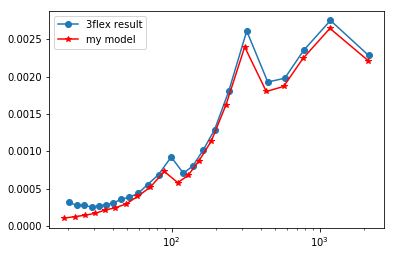

In [21]:
# When set use_pressure = False
solution = BJH_method(gas_type=gas_type)
solution.fit_transform(p=p_rels, q=q_abs)
plt.semilogx(Pore_D,Pore_volume,'o-',label='3flex result')
plt.plot(solution.Davg[:], solution.Vp[:],'r*-', label='my model')
plt.xlim()
plt.legend()

0.30384122506 3.6675853276 0.994061453291 20.3833630838
16


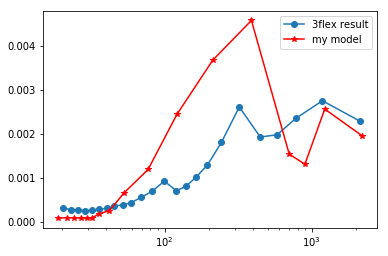

In [22]:
solution = BJH_method(gas_type=gas_type)
solution.fit_transform(p=p_my, q=q_my)
plt.semilogx(Pore_D,Pore_volume,'o-',label='3flex result')
plt.plot(solution.Davg, solution.Vp,'r*-', label='my model')
plt.xlim()
plt.legend()